# TP3

### Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

#### 1- (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos.

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
# %matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

Template_shape: (175, 400, 3)
img_detect: (363, 233, 3)


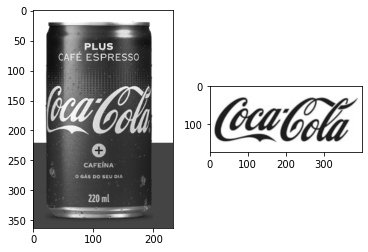

In [2]:
# Cargamos la imagen a procesar
img_template = cv.imread('./template/pattern.png')
img_detect = cv.imread('./images/coca_logo_2.png')
print('Template_shape:',img_template.shape)
print('img_detect:',img_detect.shape)
# img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_rgb= cv.cvtColor(img_detect, cv.COLOR_BGR2RGB)
template_orig= cv.cvtColor(img_template, cv.COLOR_BGR2GRAY)
img_gray= cv.cvtColor(img_detect, cv.COLOR_BGR2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(template_orig,cmap= 'gray')



Resize

In [3]:

#print(f'Tamaño original: {template_orig}')

scales = np.linspace(0.5, 4, 5)
resized_imgs = list()

# generamos nuestra "piramide" de tamaños arbitrarios
print(f'Dimensiones generadas:')
# template_orig = cv.GaussianBlur(template_orig, ksize=(3, 3), sigmaX=5)
for scale in scales:
    resized_imgs.append(cv.resize(template_orig, None, fx=scale, fy=scale))
    print(resized_imgs[-1].shape)

# mostramos las imagenes
for i, img in enumerate(resized_imgs):
    # cv.imshow(f'nivel-{i}', img)
    if (img.shape[1]) < (img_gray.shape[1]):
        template = img




Dimensiones generadas:
(88, 200)
(241, 550)
(394, 900)
(547, 1250)
(700, 1600)


In [4]:
template.shape

(88, 200)

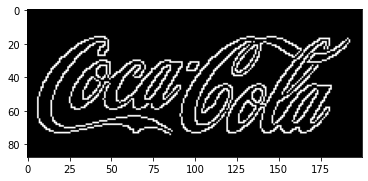

In [5]:
#template = cv.GaussianBlur(template, ksize=(3, 3), sigmaX=5)
template = cv.Canny(template,10,50,L2gradient=True)
#template = cv.medianBlur(template,3)

plt.figure()
plt.imshow(template, cmap= 'gray')

In [6]:
ret, img_gray = cv.threshold(img_gray,10,180,cv.THRESH_BINARY+cv.THRESH_OTSU)
#img_gray = cv.GaussianBlur(img_gray, ksize=(3, 3), sigmaX=5)
img_gray = cv.medianBlur(img_gray,3)
#template = cv.Canny(template,15,20,L2gradient=True)
img_gray = cv.Canny(img_gray,10,50,L2gradient=True)


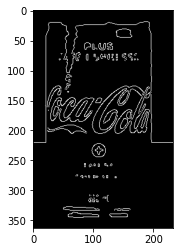

In [7]:
plt.figure()
plt.imshow(img_gray, cmap= 'gray')

In [8]:
def comparador(rect, template_orig):
    original = template_orig
    #solo para estimar el  100%
    # image_to_compare = template_orig
    image_to_compare = rect

# # 1) Check if 2 images are equals
# if original.shape == image_to_compare.shape:
#     print('Las imagenes tiene el mismo tamaño y canal')
#     difference = cv.subtract(original, image_to_compare)
#     b, g, r = cv.split(difference)
#     print(cv.countNonZero(b))
#     if (cv.countNonZero(b) == 0 and cv.countNonZero(g) == 0 and cv.countNonZero(r) == 0):
#         print('Las imagenes son completamente iguales')
#     else:
#         print('Las imagenes no son iguales')

# 2) Check la similitud de las dos imagenes
    sift = cv.xfeatures2d.SIFT_create()
    kp_1, desc_1 = sift.detectAndCompute(original, None)
    kp_2, desc_2 = sift.detectAndCompute(image_to_compare, None)

    #print("Keypoints 1st image", str(len(kp_1)))
    #print("Keypoints 2st image", str(len(kp_2)))

    index_params = dict(algorithm=0, trees=5)
    search_params = dict()
    # bf = cv.BFMatcher()
    # # K es la cantidad de "best matches" para cada descriptor
    # matches = bf.knnMatch(desc_1, desc_2, k=2)
    #************************
    flann = cv.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(desc_1, desc_2, k=2)

    good_points = []
    for m, n in matches:
        if m.distance < 0.8*n.distance:
            good_points.append(m)

    number_keypoints = 0
    if (len(kp_1) <= len(kp_2)):
        number_keypoints = len(kp_1)
    else:
        number_keypoints = len(kp_2)

    # print("GOOD matches",len(good_points))
    # print("Que tan bueno es el match", len(good_points) / number_keypoints * 100, "%")

    result = cv.drawMatches(original, kp_1, image_to_compare, kp_2, good_points, None)
    # cv.imshow("Result", cv.resize(result, None, fx = 0.4, fy=0.4))
    # cv.imwrite("Feature_matching.jpg", result)

    # cv.imshow("Original", original)
    # cv.imshow("Duplicate", image_to_compare)
    # cv.waitKey(0)
    # cv.destroyAllWindows()
    return (len(good_points)/number_keypoints) * 100

[ WARN:0@14.632] global /home/cpaelectronica/opencv_build/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (13) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


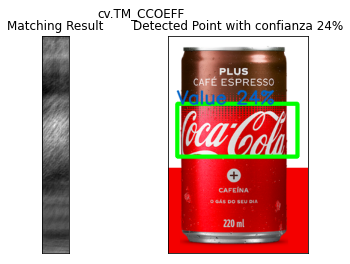

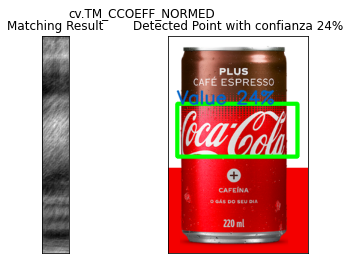

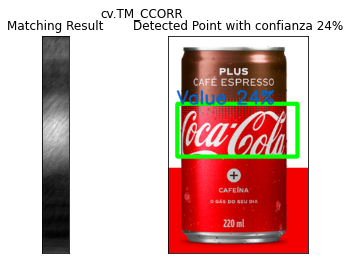

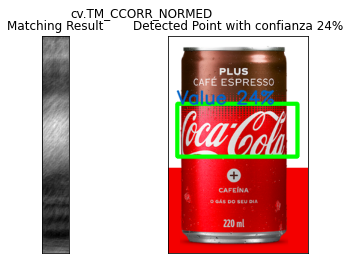

In [9]:
w, h = template.shape[::-1]
# Los 6 métodos posibles para comparación:
# methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
#             'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# No utilizaré or diferencias
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED']
color = (0, 255, 0)

for meth in methods:
    # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
    img_salida = img_rgb.copy()

    method = eval(meth)

    # Aplicamos la coincidencia de patrones
    #--------------------------------------
    res = cv.matchTemplate(img_gray, template, method)

    # Encontramos los valores máximos y mínimos
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Marcamos el lugar donde lo haya encontrado
    #----------------------------------------
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida,top_left, bottom_right, color, 5)
    #metricas
    rect = img_gray[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]]
    # confianza = comparador(np.resize(rect,template.shape), template)
    # confianza = np.uint8(comparador(np.resize(rect,template.shape), template))
    confianza = np.uint8(comparador(rect, template))
    cv.putText(img_salida,f'Value {confianza}%',top_left, cv.FONT_HERSHEY_SIMPLEX, 1, (0,100,200), 2, cv.LINE_AA)
    # Graficamos el procesamiento y la salida
    #----------------------------------------
    plt.figure()

    # Resultado de coincidencia
    plt.subplot(121),plt.imshow(res, cmap= 'gray')
    # plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

    # Imagen original con recuadros
    plt.subplot(122),plt.imshow(img_salida)
    plt.title(f'Detected Point with confianza {confianza}%'), plt.xticks([]), plt.yticks([])

    plt.suptitle(meth)
    plt.show()
    #print(res)

#### 2- (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del item 2.

#### 3- (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.

#### Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.